Dataset: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [41]:
import pandas as pd #solucion de diego

In [42]:
columnas = ['preg','glu','pres','skin','test','mass','pedi','age','class']
data = pd.read_csv('diabetes.csv',names=columnas)
data = data.drop(0)
data

,preg,glu,pres,skin,test,mass,pedi,age,class
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.34,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1


In [43]:
import pandas as pd
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [44]:
print(data.shape)
data.dtypes

(768, 9)


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [45]:
data.columns = ['preg','glu','pres','skin','test','mass','pedi','age','out'] #solucion de Diego


In [46]:
v_numericas = ['preg','glu','pres','skin','test','mass','pedi','age']
data[v_numericas] = data[v_numericas].astype(float,errors='raise')

In [47]:
import matplotlib.pyplot as plt # Solucion de Diego 


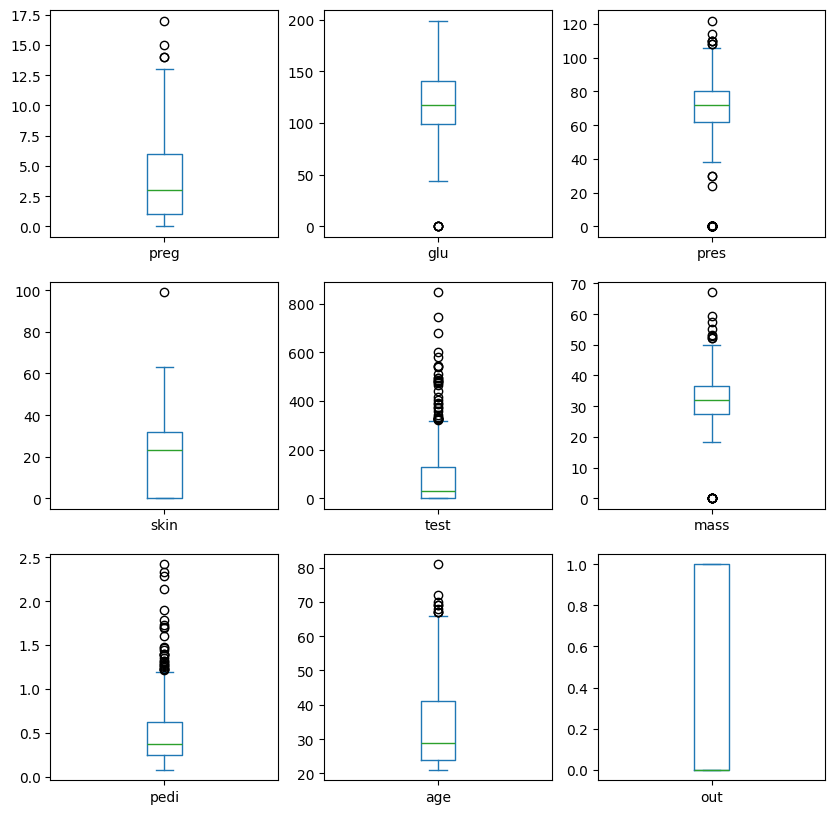

In [48]:
data.plot(kind='box',subplots=True,layout=(3,3),sharex=False,sharey=False,figsize=(10,10))
plt.show()

## **EJERCICIOS**

1. Realice un análisis de outliers univariado para la variable 'BloodPressure'.
2. Realice un análisis de outliers univariado para la variable 'Insulin'.
3. Realice un análisis de outliers univariado para la variable 'BMI'.
4. Realice un análisis de outliers univariado para la variable 'DiabetesPedigreeFunction'.
5. Realice un análisis de outliers bivariado para la variable 'Pregnancies' y 'Age'.
6. Realice un análisis de outliers bivariado para la variable 'Pregnancies' y 'BMI'.
7. Realice un análisis de outliers bivariado para la variable 'Glucose' y 'Age'.
8. Realice un análisis de outliers bivariado para la variable 'Glucose' y 'BMI'.
9. Realice un análisis de outliers multivariado para la variable 'Pregnancies', 'Age' y 'BMI'.
10. Realice un análisis de outliers multivariado para la variable 'Glucose', 'Age' y 'BMI'.

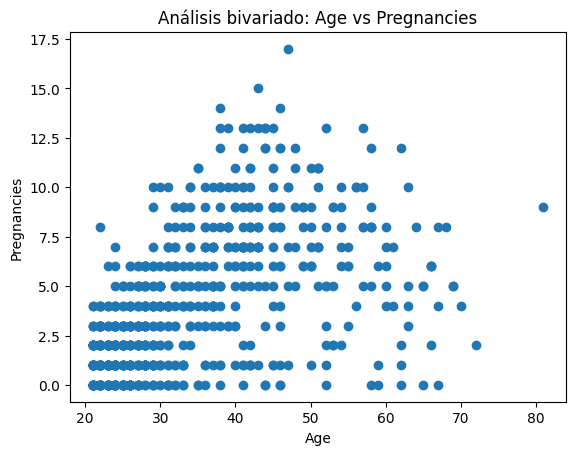

In [49]:
import matplotlib.pyplot as plt

plt.scatter(data['age'], data['preg'])
plt.xlabel('Age')
plt.ylabel('Pregnancies')
plt.title('Análisis bivariado: Age vs Pregnancies')
plt.show()


### Análisis de outliers bivariado: *Age* vs *Pregnancies*

En el gráfico de dispersión se observa que la mayoría de los casos se concentran entre los 25 y 50 años, con un número de embarazos entre 0 y 10, lo cual representa un patrón típico.  
La variable *Pregnancies* indica el número total de embarazos acumulados hasta el momento del registro, por lo que valores altos en edades mayores no necesariamente son errores, sino experiencias reproductivas pasadas.  
Sin embargo, se identifican posibles outliers en mujeres muy jóvenes con numerosos embarazos o en casos con más de 12–15 embarazos, los cuales podrían considerarse valores extremos dentro del conjunto de datos.



In [50]:
import numpy as np
import pandas as pd
from sklearn.covariance import MinCovDet
from scipy.stats import chi2  # <- si prefieres umbral teórico

# 1) Datos
cols = ['age', 'preg']
X_df = data[cols].dropna()
idx = X_df.index
X = X_df.to_numpy()

# 2) Mahalanobis robusta
mcd = MinCovDet().fit(X)
md2 = mcd.mahalanobis(X)  # distancia^2

# === Elige UNA de estas dos líneas de umbral ===
# A) Empírico (percentil 99):
thr = np.percentile(md2, 99)
# B) Teórico chi2 (comenta la de arriba y descomenta esta):
# thr = chi2.ppf(0.99, df=2)

# 3) Marcar outliers
mask_out = md2 > thr

# 4) Añadir resultados al DataFrame original
data.loc[idx, 'md2_age_preg'] = md2
data.loc[idx, 'out_bi_age_preg'] = mask_out.astype(int)

# 5) Mostrar RESUMEN en TEXTO
n_out = mask_out.sum()
n_tot = len(md2)
print(f"Outliers bivariados (Age & Pregnancies): {n_out} de {n_tot} ({100*n_out/n_tot:.2f}%)")
print(f"Umbral usado (md^2): {thr:.3f}")

# 6) Ver algunas filas atípicas
out_bi = data.loc[idx[mask_out], cols + ['md2_age_preg']].sort_values('md2_age_preg', ascending=False)
print("\nTop 10 outliers por distancia de Mahalanobis^2:")
print(out_bi.head(10).to_string(index=False))



Outliers bivariados (Age & Pregnancies): 8 de 768 (1.04%)
Umbral usado (md^2): 82.964

Top 10 outliers por distancia de Mahalanobis^2:
 age  preg  md2_age_preg
81.0   9.0    125.806944
72.0   2.0    115.340108
67.0   0.0    104.300162
65.0   0.0     94.995739
70.0   4.0     94.263588
66.0   2.0     87.084343
69.0   5.0     85.195009
69.0   5.0     85.195009
